### Variables categoricas ordinales

1. Importe los datos del archivo `data.csv`

In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_csv("data/data.csv")
data.head(10)


,Escolaridad,No. de hijos
0,Primaria trunca,9
1,Secundaria,3
2,Preparatoria,2
3,Sin escolaridad,3
4,Primaria,2
5,Preparatoria,3
6,Secundaria,0
7,Primaria,2
8,Sin escolaridad,8
9,Preparatoria,3


2. Sustituya ahora la variable categórica por valores resultantes de un polinomio cuadrático estrictamente decreciente.

In [35]:
# Asignar a cada categoría un orden lógico para después aplicarle el polinomio cuadrático: 
escolaridad_ordered = {
    'Sin escolaridad': 1,
    'Primaria trunca': 2,
    'Primaria': 3,
    'Secundaria': 4,
    'Preparatoria': 5
}
escolaridad_ordered

{'Sin escolaridad': 1,
 'Primaria trunca': 2,
 'Primaria': 3,
 'Secundaria': 4,
 'Preparatoria': 5}

In [36]:
# Mappear el dataset con el orden adecuado
data['escolaridad_index'] = data['Escolaridad'].map(escolaridad_ordered)
data.head()

,Escolaridad,No. de hijos,escolaridad_index
0,Primaria trunca,9,2
1,Secundaria,3,4
2,Preparatoria,2,5
3,Sin escolaridad,3,1
4,Primaria,2,3


In [37]:
# y = -1 * x^2 -> Polinómio cuadrático estrictamente descendiente
data['Polinomio Cuadrático'] = -1 * ( data['escolaridad_index'] ** 2)
data

,Escolaridad,No. de hijos,escolaridad_index,Polinomio Cuadrático
0,Primaria trunca,9,2,-4
1,Secundaria,3,4,-16
2,Preparatoria,2,5,-25
3,Sin escolaridad,3,1,-1
4,Primaria,2,3,-9
...,...,...,...,...
5055,Secundaria,1,4,-16
5056,Preparatoria,3,5,-25
5057,Primaria,1,3,-9
5058,Secundaria,3,4,-16


<Axes: >

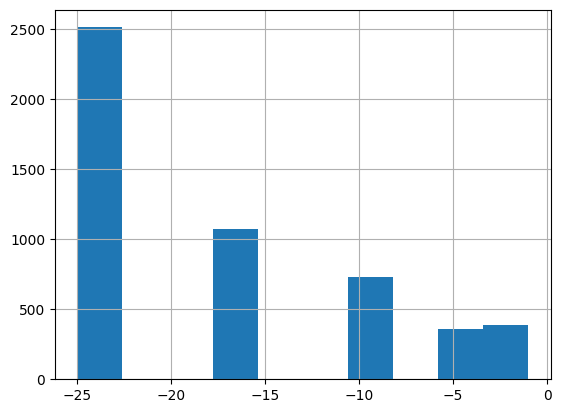

In [38]:
# Polinómio cuadrático estrictamente decreciente
data['Polinomio Cuadrático'].hist()

3. Obtenga una relación lineal usando la clase *LinearRegression* del paquete *sklearn.linear_model*, para la codificacón obtenida y la variable `No. de hijos` y grafique.

In [42]:
# Se define X e Y
X = data[['Polinomio Cuadrático']]
y = data[['No. de hijos']]

# Separación en test y train 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Instancia Linear Regression
reg = LinearRegression()
# Ajuste del modelo 
reg.fit(X_train, y_train)
# Coeficientes
print('Coeficiente:', reg.coef_[0][0])
print('Intercepto:', reg.intercept_[0])


Coeficiente: 0.06701498302099665
Intercepto: 3.743769850928288


In [47]:
# Predicción
y_pred = reg.predict(X_test)
y_pred

array([[3.140635  ],
       [2.06839528],
       [2.06839528],
       ...,
       [3.140635  ],
       [2.06839528],
       [2.67153012]])

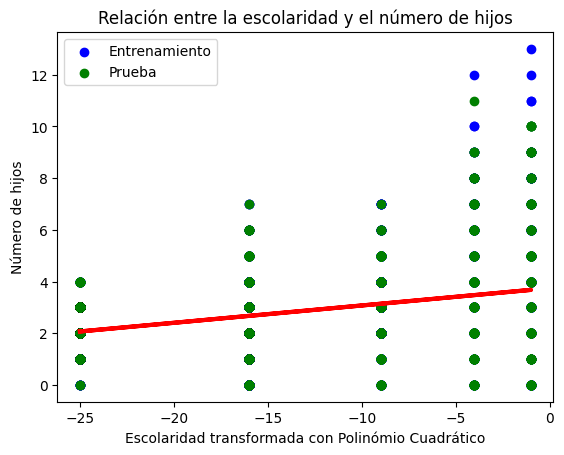

In [49]:
# Relación lineal entre la escolaridad y el número de hijos
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Prueba')
plt.plot(X_train, reg.predict(X_train), color='red', linewidth=3)
plt.title('Relación entre la escolaridad y el número de hijos')
plt.xlabel('Escolaridad transformada con Polinómio Cuadrático')
plt.ylabel('Número de hijos')
plt.legend()
plt.show()